In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA as RandomizedPCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [3]:
pca = RandomizedPCA(150) # number of components = 150
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<p><p>here we'll visualize some images (faces) associated with the first few <b>principle componenets</b>. these are technically knows as eignevectors and hence the images get their name - eigenfaces

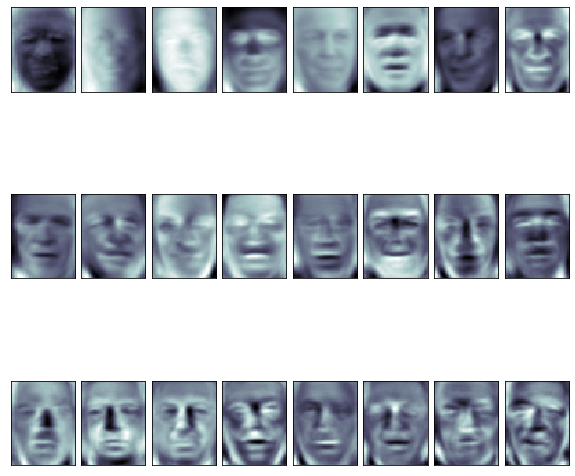

In [4]:
# plot some eigenfaces
fig, axes = plt.subplots(3, 8, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

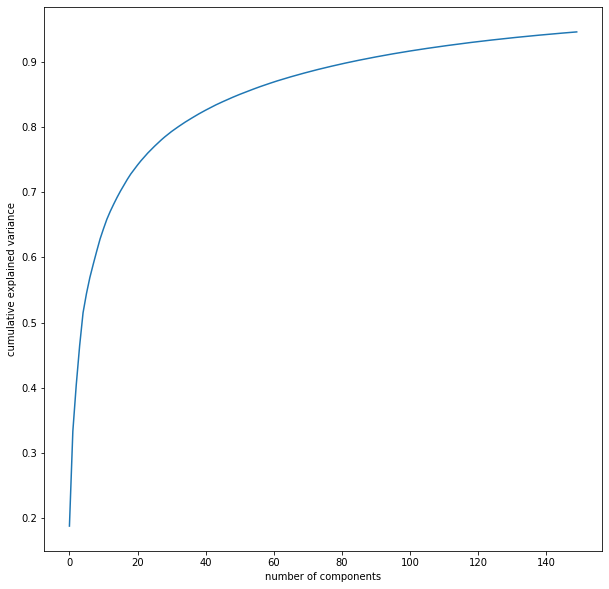

In [11]:
# plot to choose the number of principal components
plt.subplots(figsize=(10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

<p><p><p>from the graph we can see that around 150 compnents are needed to explain the variablity of the whole dataset by just above 90%<p>
to make things more interesting we can compare the input images with images reconstructed from just these 150 principal copmponents

In [12]:
# compute components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

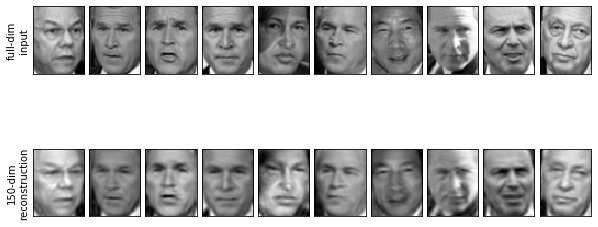

In [14]:
# plot results
fig, ax = plt.subplots(2, 10, figsize=(10, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

<p><p><p>the top row shows the original images and the bottom row contains reconstructed images<p>although it reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image<p>this indicates that our classification algorithm can be trained on 150 components instead of the total 3000 (since the images are 62x47 pixels ~= 3000)